 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
whale_data.sample(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-10-23,0.012022,0.018284,0.008114,0.017094
2018-10-19,-0.014773,0.001980,0.023742,-0.010030
2017-06-21,-0.000781,0.006751,-0.000163,0.019466
2017-12-29,0.002197,-0.000662,-0.002754,-0.001017
2015-08-21,-0.016852,-0.009937,-0.027373,-0.019140


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna().copy()
whale_data.isnull().sum()
whale_data.sort_index(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
algo_data.sample(5)

,Algo 1,Algo 2
Date,,
2018-05-09,-0.001571,0.007850
2017-06-19,0.001361,0.006281
2016-06-23,0.009213,0.013319
2016-04-11,0.005886,-0.000793
2014-10-02,0.002351,0.004266


In [6]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_data = algo_data.dropna().copy()
algo_data.sort_index(inplace=True)
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
#Read in SP500 closing price

sp500_path = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500_data.sort_index(inplace=True)
sp500_data.dropna(inplace=True)
sp500_data.head(5)



,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Fix Data Types
sp500_data['Close']=sp500_data['Close'].str.replace('$',"",regex=True)
sp500_data['Close']=sp500_data['Close'].astype("float")
sp500_data['Close'].dtypes

dtype('float64')

In [10]:
# Calculate returns
sp500_returns=sp500_data.pct_change()
sp500_returns.head(5)


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [11]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head(5)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns = {"Close":"S&P500"},inplace=True)
sp500_returns['S&P500']=sp500_returns['S&P500'].astype("float")
sp500_returns.head(5)
sp500_returns['S&P500'].dtypes

dtype('float64')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_data, sp500_returns, algo_data], axis = "columns",join="inner")
combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

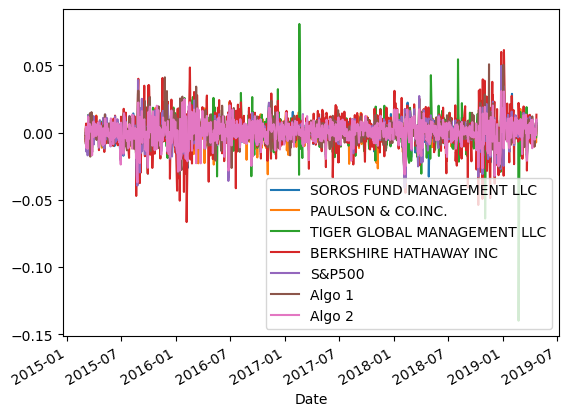

In [14]:
# Plot daily returns of all portfolios
combined_df.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

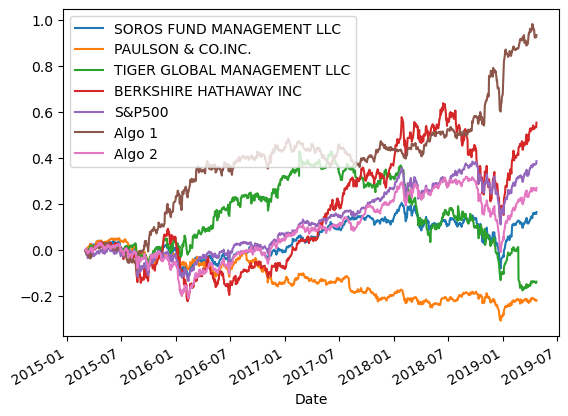

In [15]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.tail(5)
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

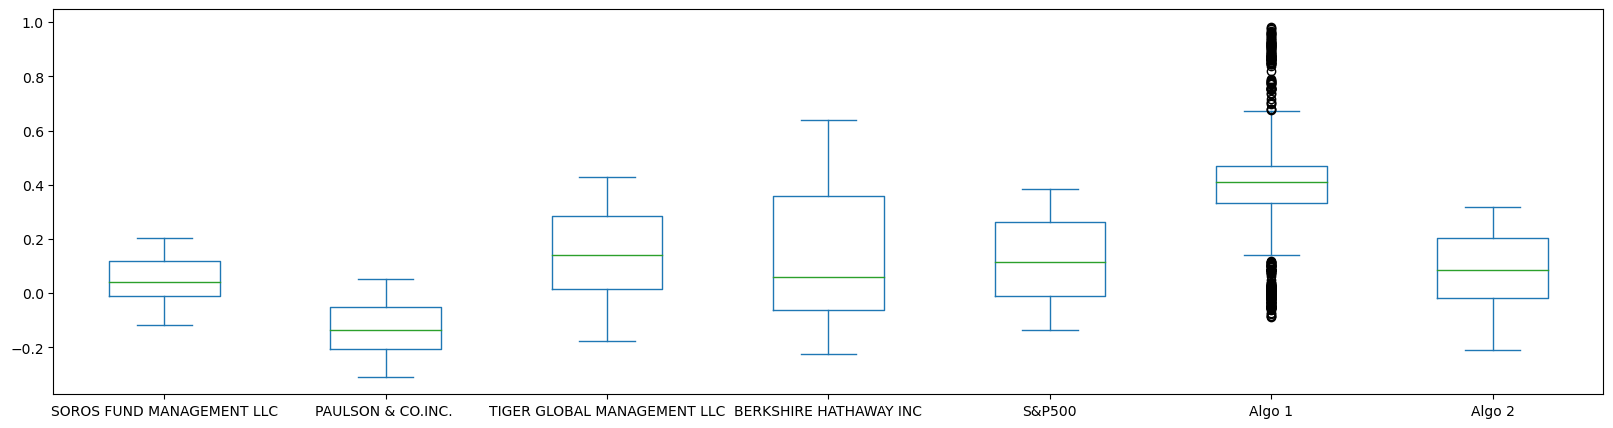

In [16]:
# Box plot to visually show risk

#COMBINED OR DAILY RETURNS??

cumulative_returns.plot.box(figsize=(20,5))

### Calculate Standard Deviations

<AxesSubplot:>

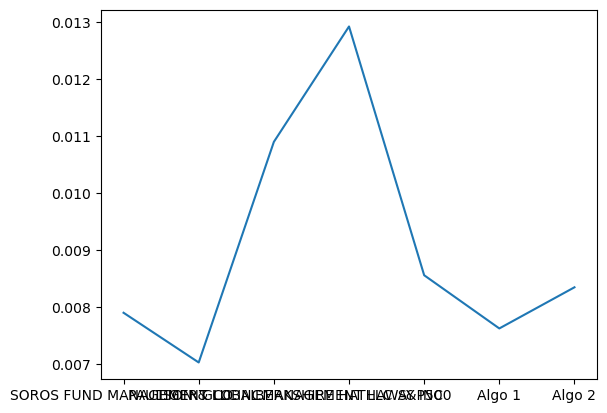

In [17]:
# Calculate the daily standard deviations of all portfolios

#COMBINED OR DAILY RETURNS?

daily_std = combined_df.std()
daily_std.head()
daily_std.plot()

### Determine which portfolios are riskier than the S&P 500

In [18]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_returns.std()
sp500_std.head()

# Determine which portfolios are riskier than the S&P 500
daily_std.head(15)



SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
S&P500                         0.008554
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)


#COMBINED OR DAILY RETURNS??

annualized_std = daily_std*np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

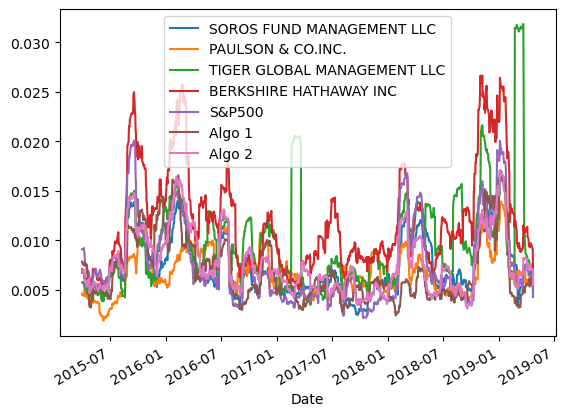

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#COMBINED OR DAILY RETURNS??

rolling21_std=combined_df.rolling(window=21).std()


# Plot the rolling standard deviation

rolling21_std.plot()


### Calculate and plot the correlation

In [21]:
# Calculate the correlation

#COMBINED OR DAILY RETURNS??

correlation = combined_df.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
S&P500,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo 1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

1.821774999163274e-05
7.316632424648712e-05
0.24899091459425635


<AxesSubplot:xlabel='Date'>

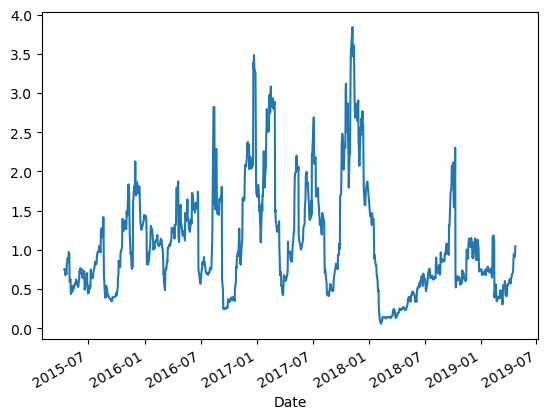

In [22]:
# Calculate covariance of a single portfolio

#Calculating Covariance of Algo 1 vs S&P 500 
covariance = combined_df['Algo 1'].cov(combined_df['S&P500'])
print(covariance)

# Calculate variance of S&P 500

SPVariance = combined_df['S&P500'].var()
print(SPVariance)

# Computing beta

Algo_1_Beta = covariance/SPVariance
print(Algo_1_Beta)

# Plot beta trend

rolling_SPVariance = combined_df['S&P500'].rolling(window=30).var()
rolling_Covariance = combined_df['Algo 1'].rolling(window=30).var()

rolling_beta = rolling_Covariance / rolling_SPVariance
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
sharpe_ratio = ((combined_df.mean()-combined_df['S&P500'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
S&P500                         0.000000
Algo 1                         0.650964
Algo 2                        -0.163336
dtype: float64

<AxesSubplot:>

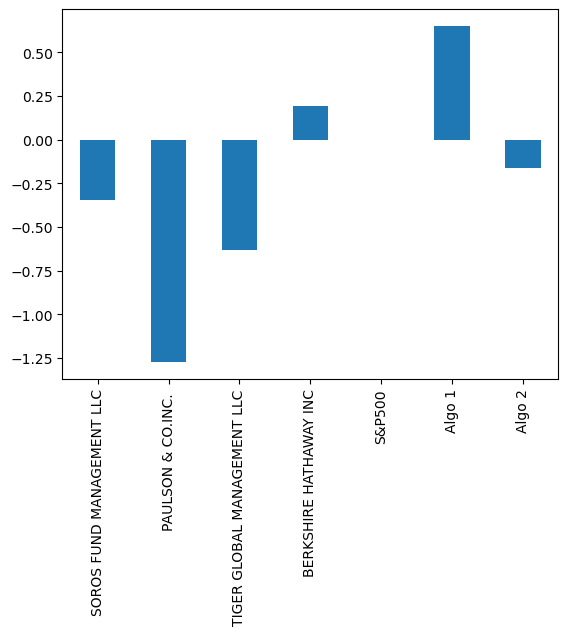

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock, Amazon
AMZ_path = Path("Resources/AMZ_stock.csv")
AMZ_data = pd.read_csv(AMZ_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
AMZ_data.rename(columns={'Close':'AMZ'},inplace=True)
AMZ_data.head(5)

,AMZ
Date,
2016-01-04,31.85
2016-01-05,31.69
2016-01-06,31.63
2016-01-07,30.40
2016-01-08,30.35


In [27]:
# Reading data from 2nd stock, Target
TGT_path = Path("Resources/TGT_Stock.csv")
TGT_data = pd.read_csv(TGT_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
TGT_data.rename(columns={'Close':'TGT'},inplace=True)
TGT_data.head(5)

,TGT
Date,
2016-01-04,73.55
2016-01-05,74.84
2016-01-06,74.08
2016-01-07,73.88
2016-01-08,71.38


In [28]:
# Reading data from 3rd stock, Domino's
DPZ_path = Path("Resources/DPZ_stock.csv")
DPZ_data = pd.read_csv(DPZ_path,index_col="Date",infer_datetime_format=True, parse_dates=True)
DPZ_data.rename(columns={'Close':'DPZ'},inplace=True)
DPZ_data.head(5)

,DPZ
Date,
2016-01-04,109.23
2016-01-05,109.93
2016-01-06,109.77
2016-01-07,106.75
2016-01-08,108.97


In [29]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([AMZ_data, TGT_data, DPZ_data], axis = "columns",join="inner")
portfolio_df.head(5)

,AMZ,TGT,DPZ
Date,,,
2016-01-04,31.85,73.55,109.23
2016-01-05,31.69,74.84,109.93
2016-01-06,31.63,74.08,109.77
2016-01-07,30.40,73.88,106.75
2016-01-08,30.35,71.38,108.97


In [30]:
# Reset Date index
portfolio_df.index_col="Date"
portfolio_df.head(5)

,AMZ,TGT,DPZ
Date,,,
2016-01-04,31.85,73.55,109.23
2016-01-05,31.69,74.84,109.93
2016-01-06,31.63,74.08,109.77
2016-01-07,30.40,73.88,106.75
2016-01-08,30.35,71.38,108.97


In [31]:
# Calculate daily returns
portfolio_returns=portfolio_df.pct_change()

# Drop NAs
portfolio_returns.dropna(inplace=True)

# Display sample data
portfolio_returns.head(5)


,AMZ,TGT,DPZ
Date,,,
2016-01-05,-0.005024,0.017539,0.006408
2016-01-06,-0.001893,-0.010155,-0.001455
2016-01-07,-0.038887,-0.002700,-0.027512
2016-01-08,-0.001645,-0.033839,0.020796
2016-01-11,0.017792,0.014570,-0.025236


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns['AMZ'] = portfolio_returns['AMZ']*(1/3)
portfolio_returns['TGT'] = portfolio_returns['TGT']*(1/3)
portfolio_returns['DPZ'] = portfolio_returns['DPZ']*(1/3)



# Calculate portfolio return

portfolio_returns['Portfolio'] = portfolio_returns['DPZ']+portfolio_returns['TGT']+portfolio_returns['AMZ']


# Display sample data


#dfST['new_date_column'] = dfST['timestamp'].dt.date

portfolio_returns.head(5)



,AMZ,TGT,DPZ,Portfolio
Date,,,,
2016-01-05,-0.001675,0.005846,0.002136,0.006308
2016-01-06,-0.000631,-0.003385,-0.000485,-0.004501
2016-01-07,-0.012962,-0.000900,-0.009171,-0.023033
2016-01-08,-0.000548,-0.011280,0.006932,-0.004896
2016-01-11,0.005931,0.004857,-0.008412,0.002375


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Join your returns DataFrame to the original returns DataFrame

All_Portfolios=pd.concat([portfolio_returns['Portfolio'],combined_df], axis = "columns")

All_Portfolios.index = All_Portfolios.index.date
All_Portfolios.sample(5)





,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
2015-08-10,NaN,0.014226,0.010811,0.008946,0.005263,0.012808,0.007062,0.010774
2015-11-20,NaN,0.005784,0.006760,0.003272,0.022681,0.003810,-0.000583,0.000913
2016-06-21,0.001942,-0.000260,-0.006424,0.001887,-0.007710,0.002712,-0.005270,-0.003010
2015-09-11,NaN,0.001460,0.002206,0.003168,0.003708,0.004487,0.005597,0.001546
2018-06-22,-0.001382,0.003406,0.004966,0.006903,-0.001542,0.001862,-0.003197,0.003373


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
import datetime

All_Portfolios.dropna(inplace=True)

All_Portfolios.head(5)


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
2016-01-05,0.006308,-0.000398,0.002242,0.006798,-0.002960,0.002012,0.009160,0.001770
2016-01-06,-0.004501,-0.011558,-0.006955,-0.003349,0.017758,-0.013115,0.010346,-0.015503
2016-01-07,-0.023033,-0.020495,-0.007167,-0.021324,-0.033944,-0.023700,-0.000081,-0.029061
2016-01-08,-0.004896,-0.008149,-0.008307,-0.010071,-0.017585,-0.010838,-0.006897,-0.012941
2016-01-11,0.002375,-0.005272,-0.001480,0.011699,-0.003927,0.000853,-0.007627,-0.018451


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
All_Portfolios_Annual = (1+All_Portfolios).cumprod()-1
All_Portfolios_Annual.tail(5)

,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
2019-01-07,0.875926,0.023043,-0.230629,-0.081546,0.255705,0.266826,0.496790,0.189184
2019-01-08,0.874950,0.034051,-0.224436,-0.080128,0.263053,0.279108,0.512993,0.201645
2019-01-09,0.893413,0.042974,-0.225056,-0.080620,0.288046,0.284350,0.513316,0.213250
2019-01-10,0.873214,0.045967,-0.225357,-0.073795,0.292120,0.290153,0.517987,0.217333
2019-01-11,0.886504,0.057671,-0.222079,-0.071896,0.289339,0.289965,0.510227,0.222062


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

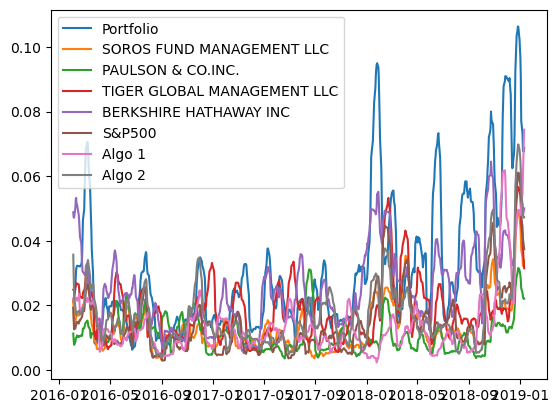

In [41]:
# Calculate rolling standard deviation
All_Portfolios_Std = All_Portfolios_Annual.rolling(window=21).std()

# Plot rolling standard deviation

All_Portfolios_Std.plot()


### Calculate and plot the correlation

<AxesSubplot:>

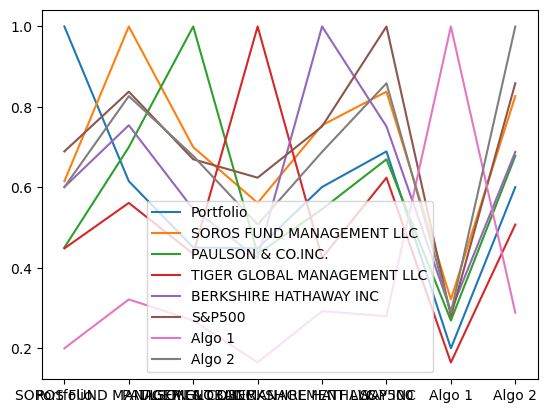

In [37]:
# Calculate and plot the correlation
All_Portfolios_Corr = All_Portfolios.corr()

All_Portfolios_Corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2019-01-07    0.000324
2019-01-08    0.000308
2019-01-09    0.000302
2019-01-10    0.000293
2019-01-11    0.000293
Length: 761, dtype: float64
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2019-01-07    0.000266
2019-01-08    0.000252
2019-01-09    0.000246
2019-01-10    0.000243
2019-01-11    0.000242
Name: S&P500, Length: 761, dtype: float64


<AxesSubplot:>

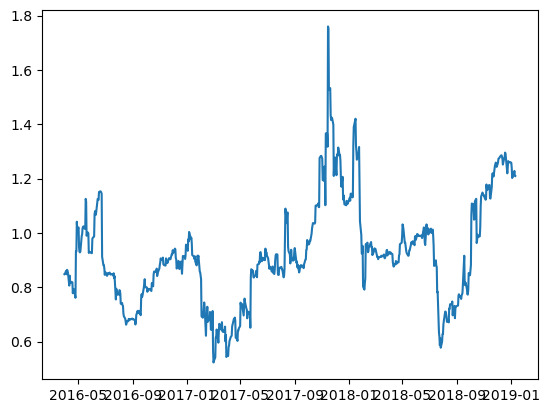

In [42]:
# Calculate and plot Beta
Portfolio_Covar =All_Portfolios['Portfolio'].rolling(60).cov(All_Portfolios['S&P500'])
print(Portfolio_Covar)

SPVariance2 = All_Portfolios['S&P500'].rolling(60).var()
print(SPVariance2)

Portfolio_Beta = Portfolio_Covar/SPVariance2
Portfolio_Beta.plot()



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios

sharpe_ratio = ((combined_df.mean()-combined_df['S&P500'].mean()) * 252) / (combined_df.std() * np.sqrt(252))




<AxesSubplot:>

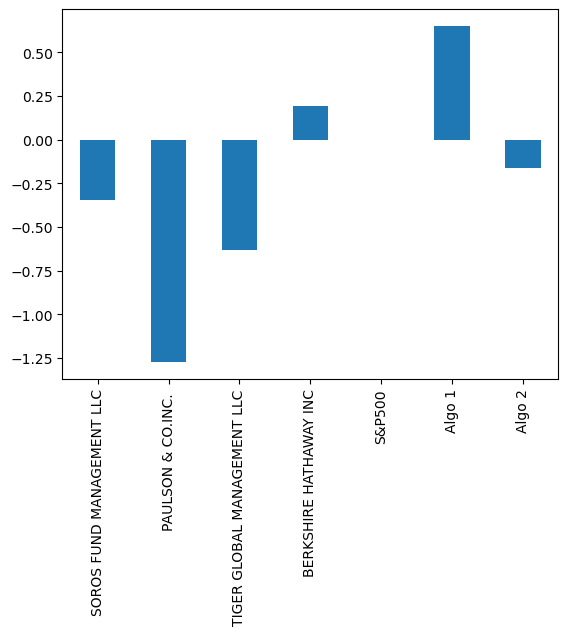

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
print('The portfolio containing Dominos, Target, and Amazon outperformed the other indecies. This is likey due to the very strong performance of Dominos over the time series analysed.') 